In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [4]:
np.random.seed(42)
rand_sam = df.sample(n=25, random_state=42)
rand_sam

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


In [55]:
# Calculated Glucose statistics for sample
sample_mean_glucose = rand_sam['Glucose'].mean()
sample_max_glucose = rand_sam['Glucose'].max()

# Calculated Glucose statistics for population
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

print("Glucose Statistics Comparison:")
print(f" Sample Mean Glucose: {sample_mean_glucose:}")
print(f" Sample Max Glucose: {sample_max_glucose}")
print(f" Population Mean Glucose: {pop_mean_glucose:}")
print(f" Population Max Glucose: {pop_max_glucose}")


Glucose Statistics Comparison:
 Sample Mean Glucose: 116.64
 Sample Max Glucose: 183
 Population Mean Glucose: 120.89453125
 Population Max Glucose: 199


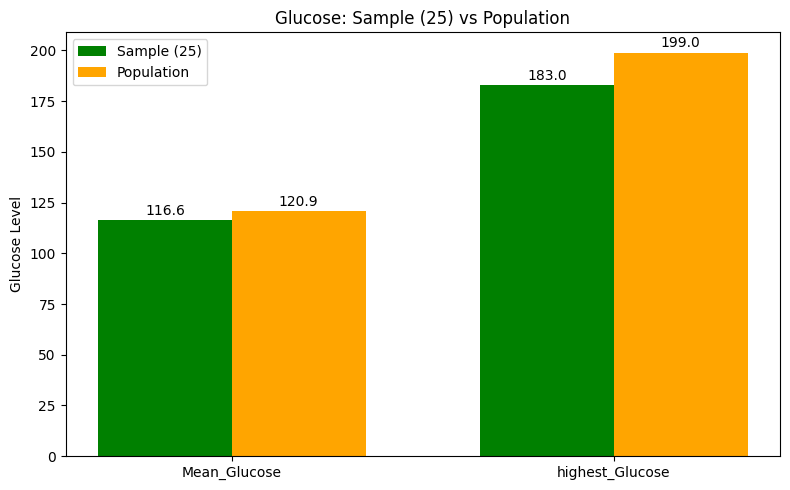

In [19]:
labels = ['Mean_Glucose', 'highest_Glucose']
sample = [sample_mean_glucose, sample_max_glucose]
population = [pop_mean_glucose, pop_max_glucose]

x = np.arange(len(labels))
width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, sample, width, label='Sample (25)', color='green')
plt.bar(x + width/2, population, width, label='Population', color='orange')
plt.ylabel('Glucose Level')
plt.title('Glucose: Sample (25) vs Population')
plt.xticks(x, labels)
plt.legend()

# Adding the values on top
for i in range(len(labels)):
    plt.text(x[i] - width/2, sample[i] + 1, f'{sample[i]:.1f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, population[i] + 1, f'{population[i]:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

Sample 98th Percentile BMI: 40.25
Population 98th Percentile BMI: 47.53


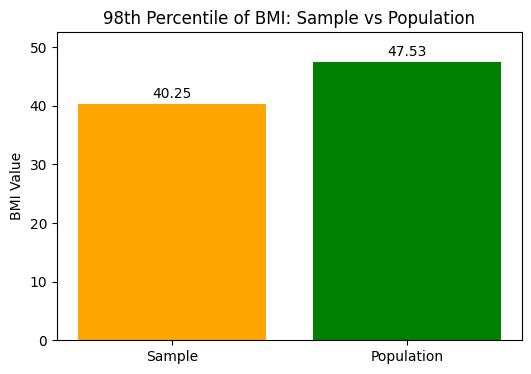

In [30]:
# Calculating 98th percentile for sample and population
sample_bmi_98 = np.percentile(rand_sam['BMI'], 98)
population_bmi_98 = np.percentile(df['BMI'], 98)

# Printing the values
print(f"Sample 98th Percentile BMI: {sample_bmi_98:.2f}")
print(f"Population 98th Percentile BMI: {population_bmi_98:.2f}")

# used Bar plot to compare Sample and Population BMI 98th percentiles
categories = ['Sample', 'Population']
values = [sample_bmi_98, population_bmi_98]
colors = ['orange', 'green']

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, color=colors)

# Adding the value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.5,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("98th Percentile of BMI: Sample vs Population")
plt.ylabel("BMI Value")
plt.ylim(0, max(values) + 5)
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [32]:
# Initializing lists to store bootstrap statistics
bts_means = []
bts_stds = []
bts_percentiles = []

# for Bootstrap i generated 500 samples, each with 150 observations
for _ in range(500):
    bts_sample = df.sample(n=150, replace=True)
    bp = bts_sample['BloodPressure']
    bts_means.append(bp.mean())
    bts_stds.append(bp.std())
    bts_percentiles.append(np.percentile(bp, 98))

# Converted lists to arrays
bts_means = np.array(bts_means)
bts_stds = np.array(bts_stds)
bts_percentiles = np.array(bts_percentiles)

# Calculating Population statistics
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_98 = np.percentile(df['BloodPressure'], 98)

# Printing Bootstrap Statistics with clear formatting
print("\nBootstrap Statistics for Blood Pressure:")
print(f"Average of Bootstrap Means: {bts_means.mean():}")
print(f"Standard Deviation of Bootstrap Means: {bts_means.std():}")
print(f"Average of Bootstrap Std Devs: {bts_stds.mean():}")
print(f"Standard Deviation of Bootstrap Std Devs: {bts_stds.std():}")
print(f"Average of Bootstrap 98th Percentiles: {bts_percentiles.mean():}")
print(f"Standard Deviation of Bootstrap 98th Percentiles: {bts_percentiles.std():}")

# Printing Population Statistics for comparison
print("\nPopulation Statistics for Blood Pressure:")
print(f"Population Mean: {pop_bp_mean:}")
print(f"Population Std Dev: {pop_bp_std:}")
print(f"Population 98th Percentile: {pop_bp_98:}")



Bootstrap Statistics for Blood Pressure:
Average of Bootstrap Means: 69.04969333333332
Standard Deviation of Bootstrap Means: 1.4632987373890698
Average of Bootstrap Std Devs: 19.29391764414314
Standard Deviation of Bootstrap Std Devs: 2.042533720452977
Average of Bootstrap 98th Percentiles: 98.06984000000003
Standard Deviation of Bootstrap 98th Percentiles: 5.094111185908684

Population Statistics for Blood Pressure:
Population Mean: 69.10546875
Population Std Dev: 19.355807170644777
Population 98th Percentile: 99.31999999999994


<ipython-input-54-4240907c63ad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=mean_df, inner='box', palette='Blues')
<ipython-input-54-4240907c63ad>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=std_df, inner='box', palette='Greens')
<ipython-input-54-4240907c63ad>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=percentile_df, inner='box', palette='Oranges')


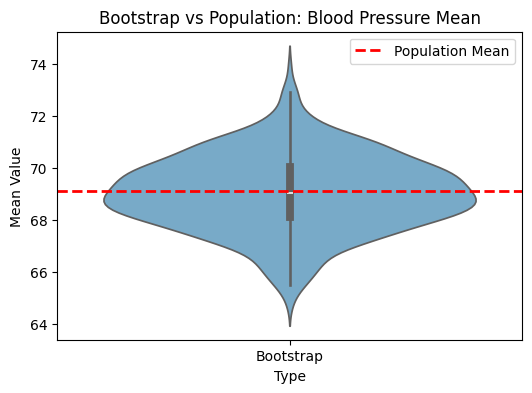

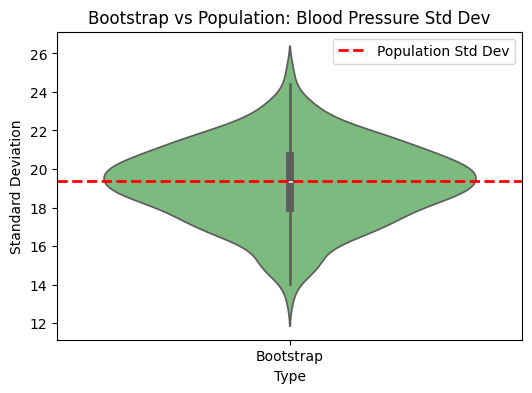

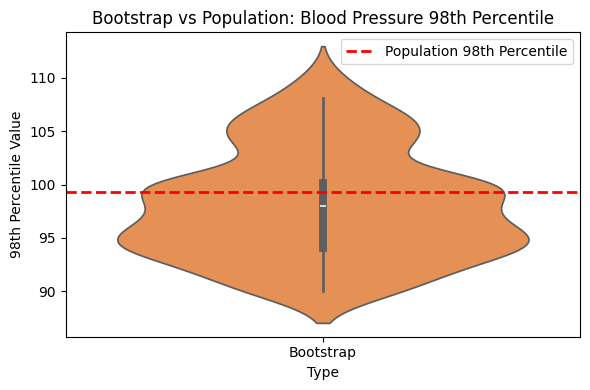

In [54]:
# Createad a separate DataFrames for each statistic
mean_df = pd.DataFrame({'Type': 'Bootstrap', 'Value': bts_means})
std_df = pd.DataFrame({'Type': 'Bootstrap', 'Value': bts_stds})
percentile_df = pd.DataFrame({'Type': 'Bootstrap', 'Value': bts_percentiles})

#   Plotting for Mean
plt.figure(figsize=(6, 4))
sns.violinplot(x='Type', y='Value', data=mean_df, inner='box', palette='Blues')
plt.axhline(pop_bp_mean, color='red', linestyle='--', linewidth=2, label='Population Mean')
plt.title("Bootstrap vs Population: Blood Pressure Mean")
plt.ylabel("Mean Value")
plt.legend()


# Plotting for Standard Deviation
plt.figure(figsize=(6, 4))
sns.violinplot(x='Type', y='Value', data=std_df, inner='box', palette='Greens')
plt.axhline(pop_bp_std, color='red', linestyle='--', linewidth=2, label='Population Std Dev')
plt.title("Bootstrap vs Population: Blood Pressure Std Dev")
plt.ylabel("Standard Deviation")
plt.legend()

# plotting for 98th Percentile
plt.figure(figsize=(6, 4))
sns.violinplot(x='Type', y='Value', data=percentile_df, inner='box', palette='Oranges')
plt.axhline(pop_bp_98, color='red', linestyle='--', linewidth=2, label='Population 98th Percentile')
plt.title("Bootstrap vs Population: Blood Pressure 98th Percentile")
plt.ylabel("98th Percentile Value")
plt.legend()

plt.tight_layout()
plt.show()


#REPORT

**Interpretation and findings**

**1. Glucose Statistics**

The mean glucose level of the sample group is lower than the population average, but the sample group has a higher peak glucose level, indicating greater variability in the glucose level distribution.

**2. Body mass index (BMI) Statistics**

This graph compares the 98th percentiles of the population and the sample. The 98th percentiles indicate that the sample has significantly lower body mass index than the population as a whole. This indicates that higher body mass index values are more common in the population than in a sample.

**3. Blood Pressure Statistics**

The bootstrap  for Blood Pressure is closely matching the population statistics. The average bootstrap mean (69.05) is nearly identical to the population mean (69.11), and the average standard deviation (19.29) closely matching with the population standard deviation (19.36). The 98th percentile from bootstrap samples (98.07) slightly underestimates the population value (99.32), likely due to fewer extreme values in smaller samples. Overall, the bootstrap proved to be a reliable method for estimating central tendency and variability.  The Minor differences observed are expected due to sampling variability.
